Time Series Analysis carries methods to research time-series statistics to extract statistical features from the data. Time Series Forecasting is used in training a Machine learning model to predict future values with the usage of historical importance.

Time Series Analysis is broadly speaking used in training machine learning models for the Economy, Weather forecasting, stock price prediction, and additionally in Sales forecasting.

It can be said that Time Series Analysis is widely used in facts based on non-stationary features.

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

There are different categories in the dataset, lets start from time series analysis and sales forecasting of furniture.

In [2]:
df = pd.read_excel("Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### Data Preprocessing
Data Preprocessing includes removing columns that we don’t need, looking for missing values, etc.

In [3]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 
        'Customer ID', 'Customer Name', 
        'Segment', 'Country', 'City', 'State', 
        'Postal Code', 'Region', 'Product ID', 
        'Category', 'Sub-Category', 'Product Name', 
        'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [4]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [5]:
# Indexing Time Series Data

furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

The current DateTime looks a little challenging to work within the dataset, so we will use the price of each day sales on average of the month for maintaining it simple. We will use the start of each month as a timestamp.

In [6]:
y = furniture['Sales'].resample('MS').mean()

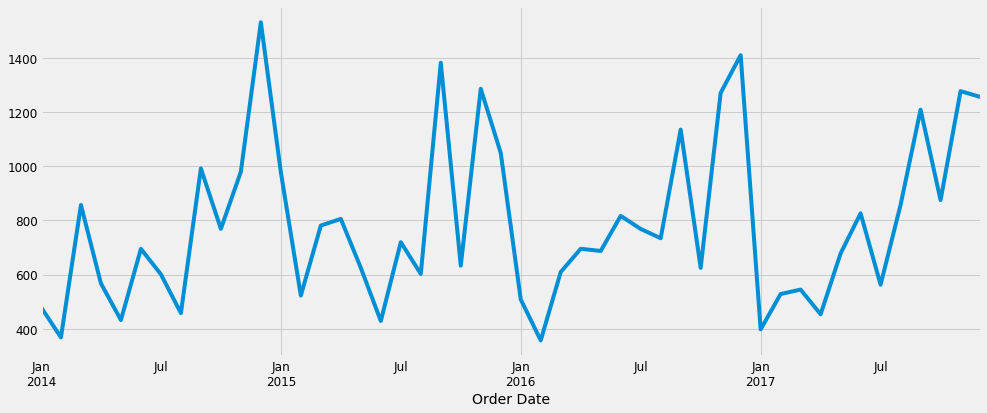

In [7]:
# Visualizing The Furniture Sales Data

y.plot(figsize=(15, 6))
plt.show()

Some patterns can be drawn from the above figure, the time series is patterned seasonally like sales are low at the beginning of every year, and sales increases at the end of the year.

Now let’s visualize this data using the time series decomposition method which will allow our time series to decompose into three components:

1. Trend
2. Season
3. Noise

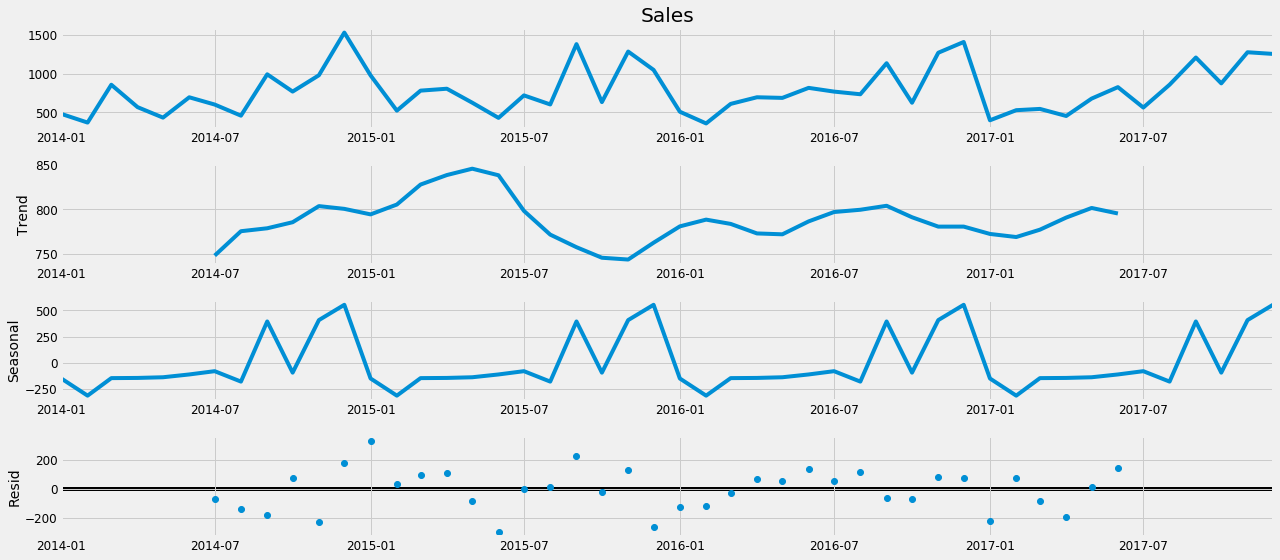

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The above figure shows that the sales of furniture is not stable because of the seasons.

### Time Series Forecasting with ARIMA

ARIMA is one of the most used methods in time series forecasting. **ARIMA stands for Autoregressive Integrated Moving Average**. We will use the ARIMA method in the further process of time series forecasting.

In [9]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is the process of selection of parameters in our Time Series Forecasting model for furniture sales.

In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1527.5898149270697
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793649
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1115.35176171801
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280303003
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758104
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2739.8783788655796


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809138
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673302


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5940741696695
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2779.7047265819165
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468634
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576522097
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1251.5125741985953
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.967122816796
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1231.500258527517
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151445
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817394
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2509.654924689819
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482932
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.58062333645836
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442755
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2412.6317822405636
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417312
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461241
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1363.4393045460597
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751609634
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679352024


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1237.0480539684784
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084571
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.58426921438655
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442186394
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2675.2428372796294
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195814156
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422193965913
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876835
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:181122.68133821196
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002123074
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131881351604
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1336.0129543321273
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619096
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587848493
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1856.7340058199832
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.62709013454145
A

In [12]:
# Fitting ARIMA Model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


Now we will run Model diagnosis; running a model diagnosis is essential in Time Series Forecasting to investigate any unusual behavior in the model.

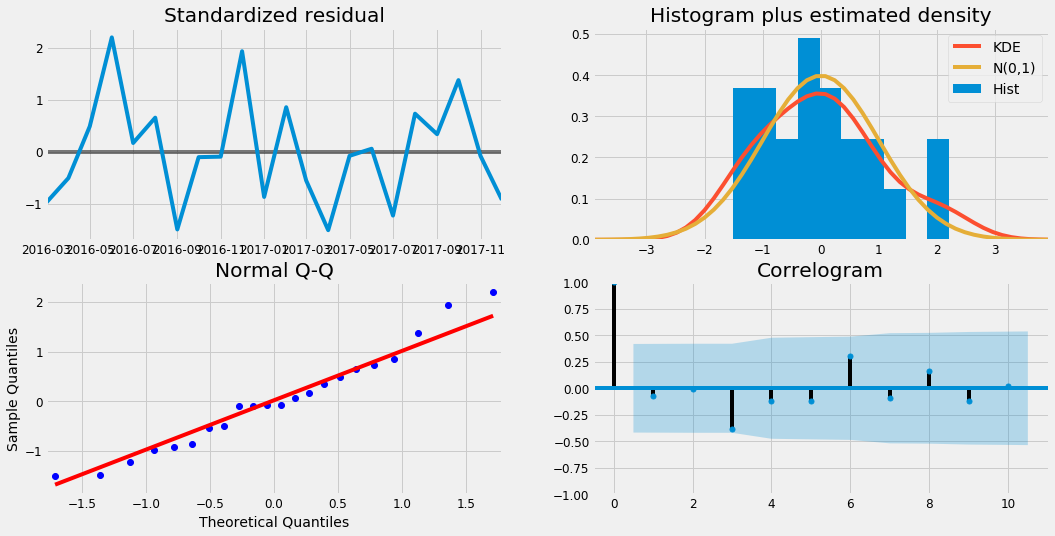

In [13]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Validating Time Series Forecasts

To understand the accuracy of our time series forecasting model, we will compare predicted sales with actual sales, and we will set the forecasts to start at 2017-01-01 to the end of the dataset.

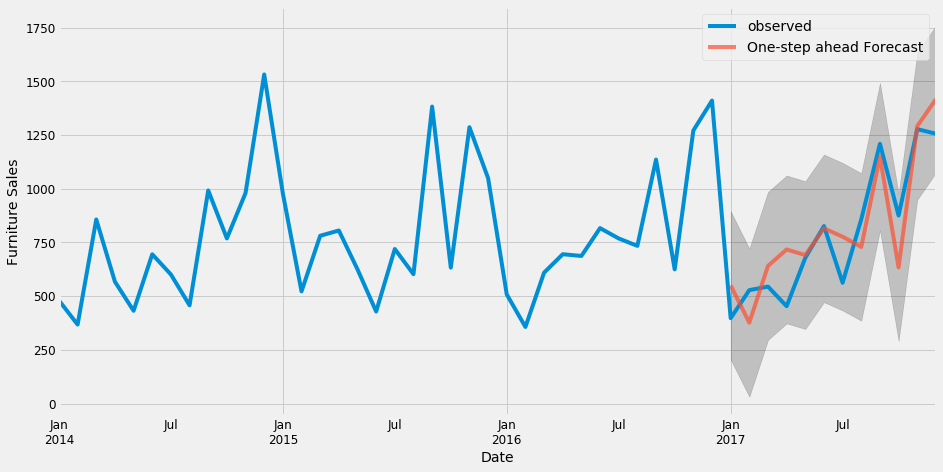

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above figure is showing the observed values in comparison with the forecast predictions. The picture is aligned with the actual sales, really well, which is showing an upward shift in the beginning and captures the seasonality at the end of the year.

In [15]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22993.58


In [16]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


In statistics, the Mean Squared Error (MSE) of an estimator measures the average of the squares of the error that is, the common squared distinction among the anticipated values and what is estimated. The MSE is a measure of the fine of an estimator, its miles continually non-negative, and the smaller the MSE, the nearer we are to locating the road of an excellent fit.

**Root Mean Square Error (RMSE)** tells us that our version was capable of forecast the average daily furniture income in the test set within `151.64` of the actual income. Our furniture day by day income range from around `400` to over `1200`. In my opinion, that is a pretty good version so far.

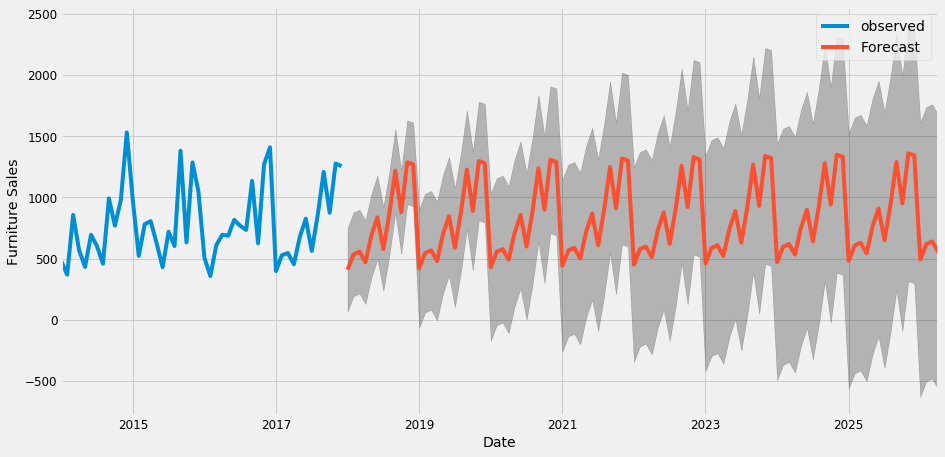

In [17]:
# Producing and visualizing forecasts

pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Our Time Series Forecasting model, without a doubt, captured furniture profits seasonality. As we forecast further out into the future, it’s very natural for us to become very much less assured in our values. This gets reflected by way of the self-belief intervals generated via our model, which grows more significant as we move similarly out into the future.